### Restore an image
We'll restore an image that has missing parts in it, using the inpaint_biharmonic() function.  

We'll work on an image from the data module, obtained by data.astronaut(). Some of the pixels have been replaced by 1s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 1s turns them totally black. The defective image is saved as an array called defect_image.  

The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas.  

Remember that inpainting is the process of reconstructing lost or deteriorated parts of images and videos.

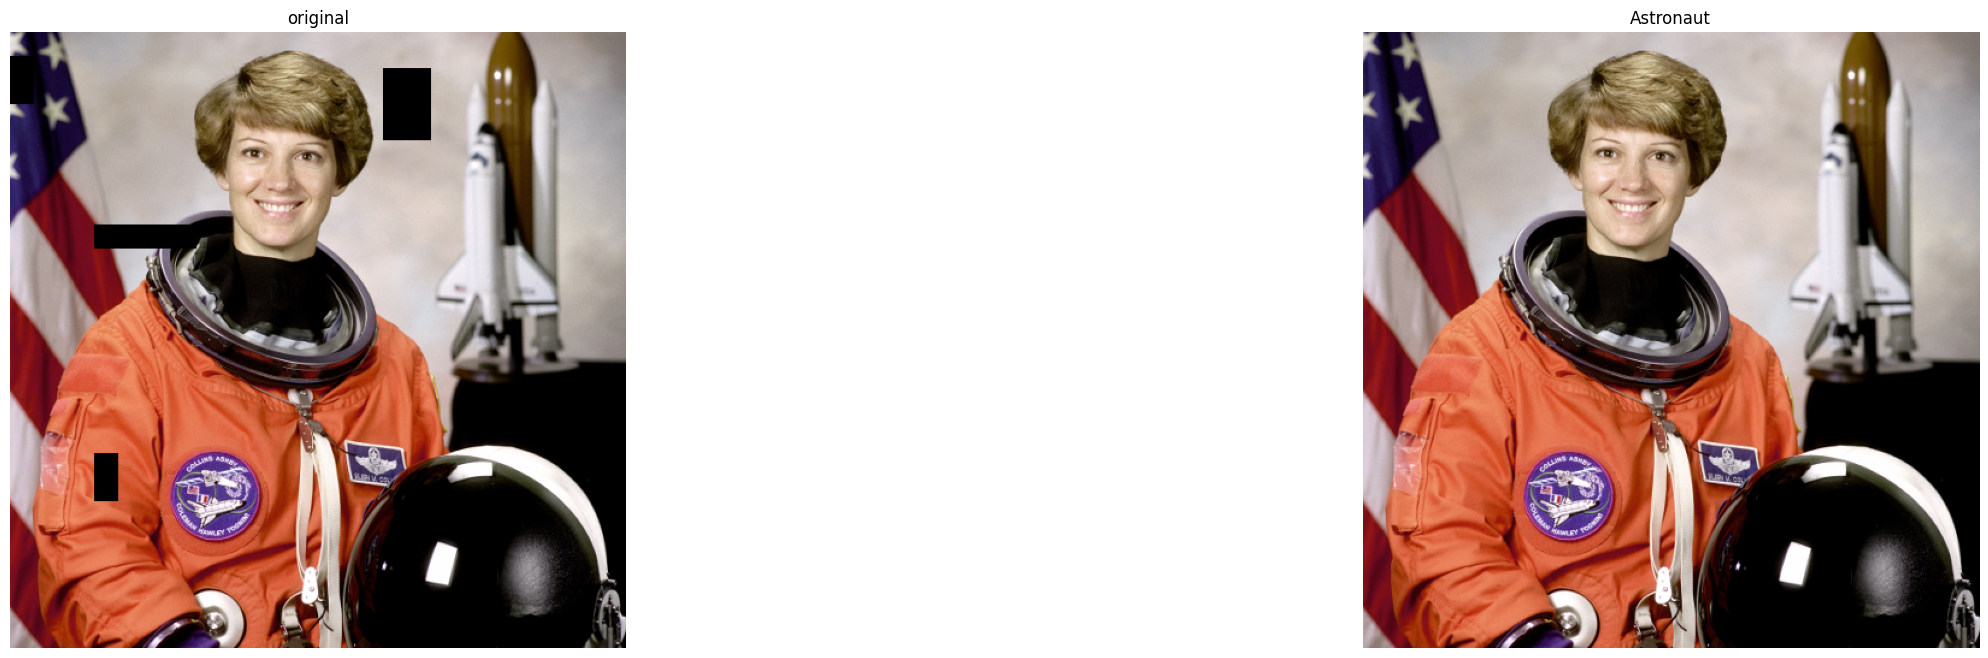

In [1]:
# From scikit-image, import the module restoration and the inpaint function.
# Show the defective image using show_image().

%matplotlib inline

import matplotlib.pyplot as plt
def show_image(image, title = 'Image', cmap_type = 'gray', interpolation = None):
    plt.imshow(image, cmap = cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparision(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (32, 8), sharex = True, sharey = True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap = plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
    
import ast
import numpy as np
from skimage import data
# scikit-image = 0.17.2
# scipy == 1.4.1

with open('defect_image.txt') as f:
    defect_image = np.array(ast.literal_eval(f.read()), dtype = 'uint8')

with open('mask.txt') as f:
    mask = np.array(ast.literal_eval(f.read()), dtype = 'uint8')
    
plot_comparision(defect_image, data.astronaut(), 'Astronaut')

In [2]:
mask.shape, data.astronaut().shape

((512, 512), (512, 512, 3))

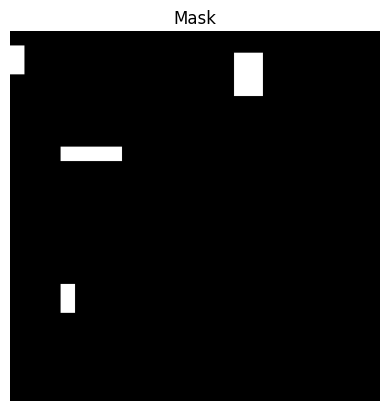

In [3]:
# Mask就是黑底白色，標示出那些地方毀損
show_image(mask, title = 'Mask', cmap_type = 'gray', interpolation = None)

In [4]:
# 修復影像，注意defect_image使用uint8
defect_image.dtype

dtype('uint8')

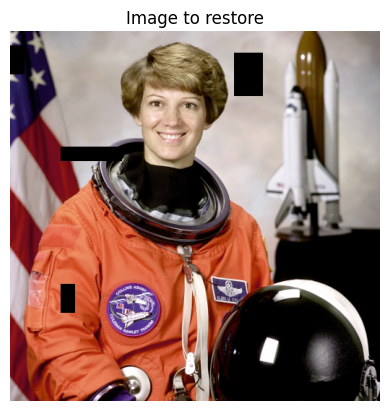

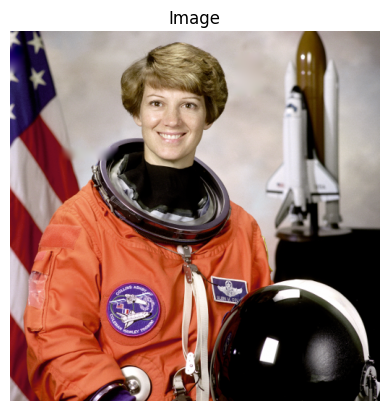

In [9]:
# Import the module from restoration
from skimage.restoration import inpaint

# Show the defective image
show_image(defect_image, 'Image to restore')

# inpaint.inpaint_biharmonic?

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, channel_axis = -1)

show_image(restored_image)

### Image Reconstruction
Removing logos As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

Landscape with small datacamp logo Image loaded as image_with_logo. You will create and set the mask to be able to erase the logo by inpainting this area.

Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it

In [11]:
# Initialize a mask with the same shape as the image, using np.zeros().
# In the mask, set the region that will be inpainted to 1 .
# Apply inpainting to image_with_logo using the mask.

with open('image_with_logo.txt') as f:
    image_with_logo = np.array(ast.literal_eval(f.read()), dtype = 'uint8')

image_with_logo.shape

(296, 512, 3)

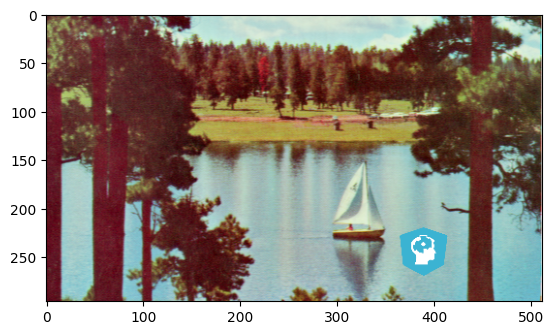

In [12]:
plt.imshow(image_with_logo)
plt.show()

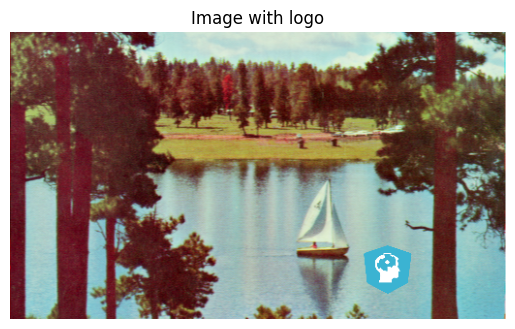

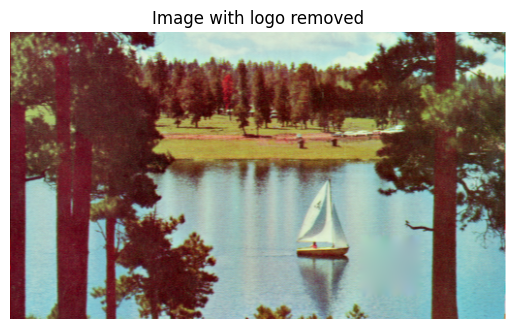

In [13]:
# Initialize the mask
import numpy as np
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  channel_axis = -1)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')